In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import warnings 
warnings.filterwarnings('ignore')

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
import eli5
import joblib

In [3]:
df = pd.read_csv('RatingData_Cleaned.csv')

In [4]:
df

,Rating,Reviews
0,1.0,"Looks wise ok,but performance and speed wise z..."
1,1.0,Don't buy mobile phone from Flipkart
2,1.0,Camera is very poor and set is not smooth enough
3,1.0,Samsung very full slow weest phone money weest...
4,1.0,"After purchasing the phone and within a week, ..."
...,...,...
30710,NaN,NaN
30711,NaN,NaN
30712,NaN,NaN
30713,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
df

,Rating,Reviews
0,1.0,"Looks wise ok,but performance and speed wise z..."
1,1.0,Don't buy mobile phone from Flipkart
2,1.0,Camera is very poor and set is not smooth enough
3,1.0,Samsung very full slow weest phone money weest...
4,1.0,"After purchasing the phone and within a week, ..."
...,...,...
20087,5.0,Printer is good with good quality printing and...
20088,5.0,Good Product
20089,5.0,Best printer
20090,5.0,"Good,, thanks flipkart"


In [7]:
df = df.astype({'Rating': int})

Converted Float to Int

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20092 entries, 0 to 20091
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   20092 non-null  int32 
 1   Reviews  20092 non-null  object
dtypes: int32(1), object(1)
memory usage: 392.4+ KB


In [9]:
df.columns

Index(['Rating', 'Reviews'], dtype='object')

In [10]:
df.skew()

Rating   -0.231298
dtype: float64

There is no skewness in the data

In [11]:
df

,Rating,Reviews
0,1,"Looks wise ok,but performance and speed wise z..."
1,1,Don't buy mobile phone from Flipkart
2,1,Camera is very poor and set is not smooth enough
3,1,Samsung very full slow weest phone money weest...
4,1,"After purchasing the phone and within a week, ..."
...,...,...
20087,5,Printer is good with good quality printing and...
20088,5,Good Product
20089,5,Best printer
20090,5,"Good,, thanks flipkart"


In [12]:
df.isnull().sum()

Rating     0
Reviews    0
dtype: int64

There are no Null Values in the data

In [13]:
df = df.astype({'Reviews': str})

Converted reviews to Str type

In [14]:
print(string.punctuation)
a1 = string.punctuation.replace('\'','') + "0123456789"
print (a1)
b1 = "                                         "
c1 = str.maketrans(a1, b1)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [15]:
comment = df['Reviews']
print(comment.head())

0    Looks wise ok,but performance and speed wise z...
1                 Don't buy mobile phone from Flipkart
2     Camera is very poor and set is not smooth enough
3    Samsung very full slow weest phone money weest...
4    After purchasing the phone and within a week, ...
Name: Reviews, dtype: object


In [16]:
df.columns

Index(['Rating', 'Reviews'], dtype='object')

In [17]:
label = df[['Rating']]
print(label.head())

   Rating
0       1
1       1
2       1
3       1
4       1


In [18]:
df['Rating'].value_counts()

5    5255
1    4181
3    4161
4    4094
2    2401
Name: Rating, dtype: int64

Label is balanced

In [19]:
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sawan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
comment = comment.reset_index()

In [21]:
comment = comment.drop(['index'],axis=1)

In [22]:
comment = comment['Reviews']
comment

0        Looks wise ok,but performance and speed wise z...
1                     Don't buy mobile phone from Flipkart
2         Camera is very poor and set is not smooth enough
3        Samsung very full slow weest phone money weest...
4        After purchasing the phone and within a week, ...
                               ...                        
20087    Printer is good with good quality printing and...
20088                                         Good Product
20089                                         Best printer
20090                               Good,, thanks flipkart
20091    Very good brother dcp 220 photo printer photo ...
Name: Reviews, Length: 20092, dtype: object

In [23]:
df

,Rating,Reviews
0,1,"Looks wise ok,but performance and speed wise z..."
1,1,Don't buy mobile phone from Flipkart
2,1,Camera is very poor and set is not smooth enough
3,1,Samsung very full slow weest phone money weest...
4,1,"After purchasing the phone and within a week, ..."
...,...,...
20087,5,Printer is good with good quality printing and...
20088,5,Good Product
20089,5,Best printer
20090,5,"Good,, thanks flipkart"


In [24]:
df['Reviews'] = df['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [25]:
df['Reviews'] = df['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2-,3}(/\S*)?$','webaddress')

In [26]:
df['Reviews'] = df['Reviews'].str.replace(r'£|\$','dollers')

In [27]:
df['Reviews'] = df['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [28]:
df['Reviews'] = df['Reviews'].str.replace(r'\d+(\.\d+)?','number')

In [29]:
df['Reviews'] = df['Reviews'].str.replace(r'[^\w\d\s]',' ')

In [30]:
df['Reviews'] = df['Reviews'].str.replace(r'\s+',' ')

In [31]:
df['Reviews'] = df['Reviews'].str.replace(r'^\s+|\s+?$','')

Cleaned the data

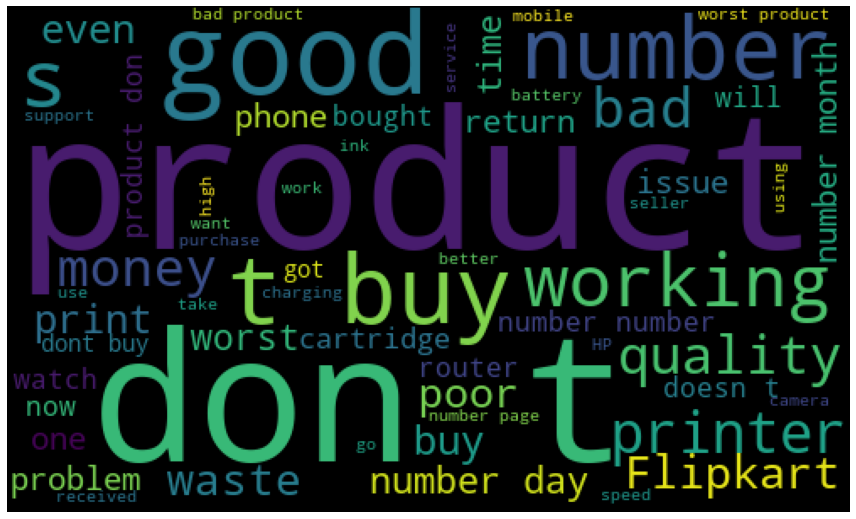

In [32]:
x1 = df['Reviews'][df['Rating']==1]
x2 = WordCloud(width=500, height=300, max_words=60).generate(''.join(x1))
plt.figure(figsize=(12,10))
plt.imshow(x2)
plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [34]:
df

,Rating,Reviews
0,1,Looks wise ok but performance and speed wise z...
1,1,Don t buy mobile phone from Flipkart
2,1,Camera is very poor and set is not smooth enough
3,1,Samsung very full slow weest phone money weest...
4,1,After purchasing the phone and within a week i...
...,...,...
20087,5,Printer is good with good quality printing and...
20088,5,Good Product
20089,5,Best printer
20090,5,Good thanks flipkart


In [35]:
for i in range(len(df['Reviews'])):
    df['Reviews'][i] = df['Reviews'][i].lower()
    x3 = []
    for i1 in df['Reviews'][i].split():
        x3.append(lemmatizer.lemmatize(i1, pos='v'))
        df['Reviews'][i] = "".join(i1)

In [36]:
df

,Rating,Reviews
0,1,again
1,1,flipkart
2,1,enough
3,1,bad
4,1,experience
...,...,...
20087,5,good
20088,5,product
20089,5,printer
20090,5,flipkart


In [37]:
y = df['Rating']

In [38]:
vec = TfidfVectorizer()
x = vec.fit_transform(comment)

In [39]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

# MultinomialNB

In [40]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    multiNB = MultinomialNB()
    multiNB.fit(x_train,y_train)
    y_pred=multiNB.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.6151702170017918 Random_state 1
max_accuracy 0.6151702170017918 max_Random_state 1
accuracy 0.6352777224766076 Random_state 2
max_accuracy 0.6352777224766076 max_Random_state 2
accuracy 0.6171610591280111 Random_state 3
accuracy 0.6080031853474019 Random_state 4
accuracy 0.6235317539319132 Random_state 5
accuracy 0.6205454907425841 Random_state 6
accuracy 0.6141747959386821 Random_state 7
accuracy 0.6233326697192912 Random_state 8
accuracy 0.6145729643639259 Random_state 9
accuracy 0.6221381644435596 Random_state 10
accuracy 0.6169619749153892 Random_state 11
accuracy 0.6181564801911208 Random_state 12
accuracy 0.6137766275134382 Random_state 13
accuracy 0.5978498905036831 Random_state 14
accuracy 0.6125821222377066 Random_state 15
accuracy 0.6159665538522795 Random_state 16
accuracy 0.6177583117658769 Random_state 17
accuracy 0.6167628907027672 Random_state 18
accuracy 0.6147720485765479 Random_state 19
accuracy 0.6119848695998408 Random_state 20
accuracy 0.6177583117658769

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
multiNB = MultinomialNB()
multiNB.fit(x_train,y_train)

print_score(multiNB,x_train,x_test,y_train,y_test, train=True)
print_score(multiNB,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 65.21%

===============Test Result===============
Accuracy Score: 63.53%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.70      0.86      0.77      1083
           2       0.84      0.16      0.26       543
           3       0.54      0.63      0.58      1033
           4       0.71      0.38      0.50      1031
           5       0.62      0.85      0.71      1333

    accuracy                           0.64      5023
   macro avg       0.68      0.58      0.57      5023
weighted avg       0.66      0.64      0.61      5023



# LogisticRegression

In [42]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.6701174596854469 Random_state 1
max_accuracy 0.6701174596854469 max_Random_state 1
accuracy 0.666533943858252 Random_state 2
accuracy 0.6657376070077643 Random_state 3
accuracy 0.6627513438184351 Random_state 4
accuracy 0.6661357754330082 Random_state 5
accuracy 0.6573760700776429 Random_state 6
accuracy 0.6579733227155087 Random_state 7
accuracy 0.6629504280310571 Random_state 8
accuracy 0.6525980489747163 Random_state 9
accuracy 0.6659366912203862 Random_state 10
accuracy 0.6651403543698985 Random_state 11
accuracy 0.6645431017320327 Random_state 12
accuracy 0.6587696595659964 Random_state 13
accuracy 0.6575751542902648 Random_state 14
accuracy 0.6617559227553255 Random_state 15
accuracy 0.6573760700776429 Random_state 16
accuracy 0.6591678279912403 Random_state 17
accuracy 0.6611586701174597 Random_state 18
accuracy 0.6531953016125821 Random_state 19
accuracy 0.6605614174795938 Random_state 20
accuracy 0.6661357754330082 Random_state 21
accuracy 0.6547879753135576 Random_

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 141)
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 71.63%

===============Test Result===============
Accuracy Score: 68.07%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.73      0.84      0.78      1073
           2       0.63      0.44      0.52       606
           3       0.59      0.67      0.63      1036
           4       0.68      0.53      0.60       991
           5       0.72      0.79      0.76      1317

    accuracy                           0.68      5023
   macro avg       0.67      0.65      0.66      5023
weighted avg       0.68      0.68      0.67      5023



# RandomForestClassifier

In [44]:
maxAccu =0 
maxRS= 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7330280708739797 Random_state 1
max_accuracy 0.7330280708739797 max_Random_state 1
accuracy 0.7280509655584312 Random_state 2
accuracy 0.7338244077244674 Random_state 3
max_accuracy 0.7338244077244674 max_Random_state 3
accuracy 0.732231734023492 Random_state 4
accuracy 0.7362134182759307 Random_state 5
max_accuracy 0.7362134182759307 max_Random_state 5
accuracy 0.7330280708739797 Random_state 6
accuracy 0.7360143340633087 Random_state 7
accuracy 0.7413896078041011 Random_state 8
max_accuracy 0.7413896078041011 max_Random_state 8
accuracy 0.73203264981087 Random_state 9
accuracy 0.7282500497710531 Random_state 10
accuracy 0.738801513040016 Random_state 11
accuracy 0.7415886920167231 Random_state 12
max_accuracy 0.7415886920167231 max_Random_state 12
accuracy 0.73203264981087 Random_state 13
accuracy 0.738602428827394 Random_state 14
accuracy 0.7312363129603823 Random_state 15
accuracy 0.7282500497710531 Random_state 16
accuracy 0.7326299024487358 Random_state 17
accuracy 0.7

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 69)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 85.35%

===============Test Result===============
Accuracy Score: 74.24%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.80      0.87      0.83      1059
           2       0.82      0.60      0.69       569
           3       0.66      0.80      0.72      1045
           4       0.74      0.56      0.64      1014
           5       0.75      0.80      0.77      1336

    accuracy                           0.74      5023
   macro avg       0.75      0.73      0.73      5023
weighted avg       0.75      0.74      0.74      5023



# DecisionTreeClassifier

In [46]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7063507863826398 Random_state 1
max_accuracy 0.7063507863826398 max_Random_state 1
accuracy 0.6973919968146526 Random_state 2
accuracy 0.7021700179175792 Random_state 3
accuracy 0.7045590284690424 Random_state 4
accuracy 0.7053553653195301 Random_state 5
accuracy 0.6916185546486163 Random_state 6
accuracy 0.7061517021700179 Random_state 7
accuracy 0.7041608600437985 Random_state 8
accuracy 0.6908222177981286 Random_state 9
accuracy 0.7073462074457495 Random_state 10
max_accuracy 0.7073462074457495 max_Random_state 10
accuracy 0.6999800915787378 Random_state 11
accuracy 0.7115269759108103 Random_state 12
max_accuracy 0.7115269759108103 max_Random_state 12
accuracy 0.6969938283894087 Random_state 13
accuracy 0.7019709337049572 Random_state 14
accuracy 0.6989846705156281 Random_state 15
accuracy 0.7029663547680669 Random_state 16
accuracy 0.7085407127214812 Random_state 17
accuracy 0.6965956599641648 Random_state 18
accuracy 0.7047581126816643 Random_state 19
accuracy 0.6948039

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 193)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 85.36%

===============Test Result===============
Accuracy Score: 72.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.77      0.81      0.79      1034
           2       0.69      0.61      0.65       620
           3       0.66      0.78      0.72      1055
           4       0.73      0.60      0.65      1050
           5       0.75      0.77      0.76      1264

    accuracy                           0.72      5023
   macro avg       0.72      0.71      0.71      5023
weighted avg       0.72      0.72      0.72      5023



# GradientBoostingClassifier

In [48]:
maxAccu =0 
maxRS= 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    gbdt = GradientBoostingClassifier()
    gbdt.fit(x_train,y_train)
    y_pred=gbdt.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.6259207644833764 Random_state 1
max_accuracy 0.6259207644833764 max_Random_state 1
accuracy 0.6261198486959985 Random_state 2
max_accuracy 0.6261198486959985 max_Random_state 2
accuracy 0.6215409118056938 Random_state 3
accuracy 0.6161656380649014 Random_state 4
accuracy 0.6303006171610591 Random_state 5
max_accuracy 0.6303006171610591 max_Random_state 5
accuracy 0.610790364324109 Random_state 6
accuracy 0.6225363328688035 Random_state 7
accuracy 0.6265180171212423 Random_state 8
accuracy 0.6165638064901453 Random_state 9
accuracy 0.6217399960183158 Random_state 10
accuracy 0.6229345012940474 Random_state 11
accuracy 0.6243280907824009 Random_state 12
accuracy 0.6219390802309377 Random_state 13
accuracy 0.6151702170017918 Random_state 14
accuracy 0.6177583117658769 Random_state 15
accuracy 0.6283097750348398 Random_state 16
accuracy 0.6269161855464862 Random_state 17
accuracy 0.6219390802309377 Random_state 18
accuracy 0.611188532749353 Random_state 19
accuracy 0.62293450129

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 51)
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 66.20%

===============Test Result===============
Accuracy Score: 64.24%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.73      0.79      0.76      1062
           2       0.56      0.40      0.47       587
           3       0.55      0.63      0.59      1030
           4       0.63      0.51      0.56      1025
           5       0.68      0.75      0.71      1319

    accuracy                           0.64      5023
   macro avg       0.63      0.61      0.62      5023
weighted avg       0.64      0.64      0.64      5023



# Support Vector Classifier

In [50]:
maxAccu =0 
maxRS= 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    svc = SVC()
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.722476607605017 Random_state 1
max_accuracy 0.722476607605017 max_Random_state 1
accuracy 0.7153095759506272 Random_state 2
accuracy 0.721879354967151 Random_state 3
accuracy 0.7246665339438583 Random_state 4
max_accuracy 0.7246665339438583 max_Random_state 4
accuracy 0.722078439179773 Random_state 5
accuracy 0.7212821023292852 Random_state 6
accuracy 0.7212821023292852 Random_state 7
accuracy 0.732231734023492 Random_state 8
max_accuracy 0.732231734023492 max_Random_state 8
accuracy 0.7113278916981883 Random_state 9
accuracy 0.7240692813059925 Random_state 10
accuracy 0.7272546287079434 Random_state 11
accuracy 0.7242683655186144 Random_state 12
accuracy 0.7184949233525781 Random_state 13
accuracy 0.7155086601632491 Random_state 14
accuracy 0.7202866812661756 Random_state 15
accuracy 0.7204857654787975 Random_state 16
accuracy 0.7174995022894685 Random_state 17
accuracy 0.7165040812263588 Random_state 18
accuracy 0.7129205653991638 Random_state 19
accuracy 0.714115070674895

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 51)
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 81.23%

===============Test Result===============
Accuracy Score: 73.46%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.78      0.89      0.83      1062
           2       0.80      0.53      0.64       587
           3       0.64      0.76      0.69      1030
           4       0.79      0.56      0.66      1025
           5       0.73      0.82      0.77      1319

    accuracy                           0.73      5023
   macro avg       0.75      0.71      0.72      5023
weighted avg       0.74      0.73      0.73      5023



# KNeighborsClassifier

In [52]:
maxAccu =0 
maxRS= 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.5928727851881346 Random_state 1
max_accuracy 0.5928727851881346 max_Random_state 1
accuracy 0.5940672904638662 Random_state 2
max_accuracy 0.5940672904638662 max_Random_state 2
accuracy 0.5948636273143539 Random_state 3
max_accuracy 0.5948636273143539 max_Random_state 3
accuracy 0.5884929325104519 Random_state 4
accuracy 0.5735616165638064 Random_state 5
accuracy 0.5867011745968544 Random_state 6
accuracy 0.5900856062114275 Random_state 7
accuracy 0.5986462273541708 Random_state 8
max_accuracy 0.5986462273541708 max_Random_state 8
accuracy 0.5745570376269162 Random_state 9
accuracy 0.5721680270754529 Random_state 10
accuracy 0.5859048377463667 Random_state 11
accuracy 0.6018315747561218 Random_state 12
max_accuracy 0.6018315747561218 max_Random_state 12
accuracy 0.5940672904638662 Random_state 13
accuracy 0.5970535536531953 Random_state 14
accuracy 0.5910810272745372 Random_state 15
accuracy 0.604817837945451 Random_state 16
max_accuracy 0.604817837945451 max_Random_state 16

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 23)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 69.26%

===============Test Result===============
Accuracy Score: 60.98%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.72      0.72      0.72      1077
           2       0.47      0.44      0.46       588
           3       0.51      0.70      0.59       989
           4       0.61      0.50      0.55      1026
           5       0.69      0.62      0.65      1343

    accuracy                           0.61      5023
   macro avg       0.60      0.59      0.59      5023
weighted avg       0.62      0.61      0.61      5023



## Findings

- MultinomialNB - Accuracy Score of Train Result is 65.21% and Test Result is 63.53%
- LogisticsRegression -  Accuracy Score of Train Result is 71.63% and Test Result is 68.07%
- RandomForestClassifier - Accuracy Score of Train Result is 85.35% and Test Result is 74.24%
- DecisionTreeClassifier - Accuracy Score of Train Result is 85.36% and Test Result is 72.19%
- GradientBoostingClassifier - Accuracy Score of Train Result is 66.20% and Test Result is 64.24%
- Support Vector Classifier - Accuracy Score of Train Result is 81.23% and Test Result is 73.46%
- KNeighborsClassifier - Accuracy Score of Train Result is 69.26% and Test Result is 60.98%


#### Choosing MultinomialNB for hyper tuning since it has higher train and test accuracy score and they are close to each otherm

# Hyper Parameter Tuning

In [54]:
grid_param = {
    'alpha': range(1,10),
    'fit_prior': [True, False]
}

Selecting Parameters for Hyper Parameter Tuning

In [80]:
grid_search = GridSearchCV(estimator=multiNB,
                          param_grid=grid_param,
                          cv=10,
                          n_jobs =-1,
                          scoring = 'accuracy')

Searching the best grid for the model

In [81]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(alpha=1, fit_prior=False),
             n_jobs=-1,
             param_grid={'alpha': range(1, 10), 'fit_prior': [True, False]},
             scoring='accuracy')

In [82]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'alpha': 1, 'fit_prior': False}


In [83]:
multiNB = MultinomialNB(alpha= 1, fit_prior= False)
multiNB.fit(x_train,y_train)

MultinomialNB(alpha=1, fit_prior=False)

Applying best parameters to train the model

In [84]:
y_pred = multiNB.predict(x_test)
pred = multiNB.predict(x_train)

In [85]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 67.72%
Test Accuracy Score: 63.17%
              precision    recall  f1-score   support

           1       0.72      0.82      0.76      1077
           2       0.54      0.32      0.40       588
           3       0.51      0.65      0.57       989
           4       0.69      0.41      0.52      1026
           5       0.66      0.78      0.71      1343

    accuracy                           0.63      5023
   macro avg       0.62      0.59      0.59      5023
weighted avg       0.63      0.63      0.62      5023



- Previous Test Accuracy Score 63.53% and New Test Accuracy score 63.17%
- Previous Train Accuracy Score 65.21% and New Train Accuracy score 67.72%

# Saving the Model

In [ ]:
file = 'Rating_Prediction.pickle'
pickle.dump(multiNB, open(file, 'wb'))